I spent an entire month answering pandas related stackoverflow question earning over 1,000 reputation.  Below are some of the more useful methods that aren't necessarily covered intro tutorials that help solve common problems with pandas.

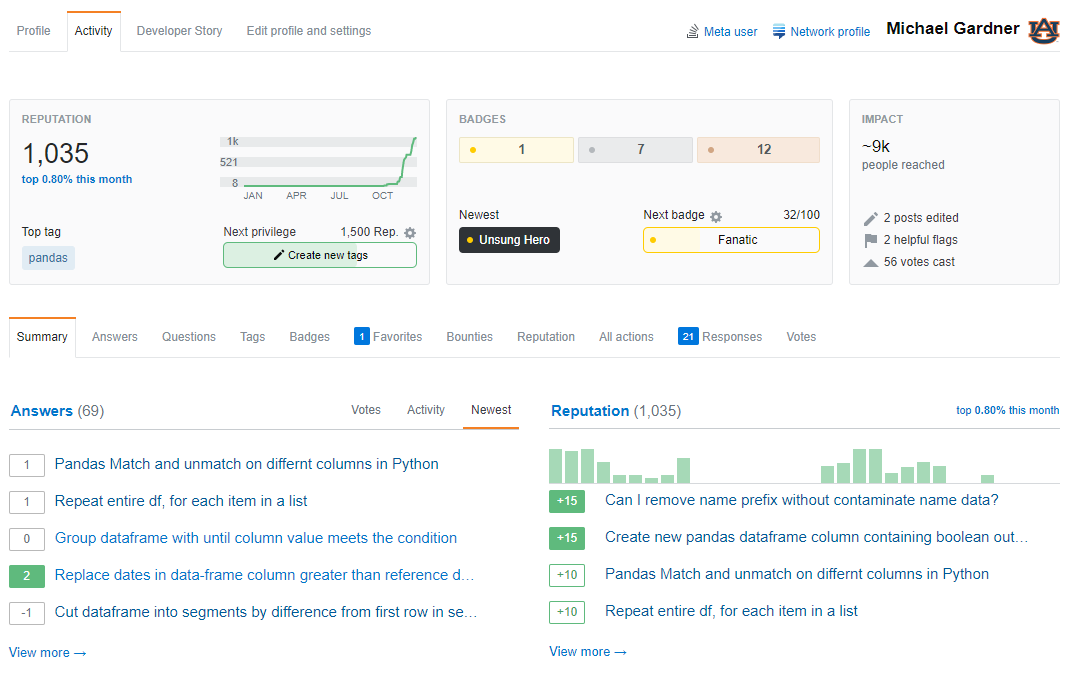

In [1]:
import pandas as pd
import numpy as np

## np.where

A faster way to implement an if else condition

In [2]:
# Sample Data
df = pd.DataFrame(['Dog', 'Cat'] * 2, columns=['Adult'])

df

,Adult
0,Dog
1,Cat
2,Dog
3,Cat


In [3]:
# Assign new column where "Puppy" if [Adult] equal "Dog" etc..
df['Baby'] = np.where(df['Adult'].eq('Dog'), 'Puppy', 'Kitten')

df

,Adult,Baby
0,Dog,Puppy
1,Cat,Kitten
2,Dog,Puppy
3,Cat,Kitten


## np.select

An alternative to np.where when you have multiple conditions


In [4]:
df = pd.DataFrame({"color"  : ["red", "green", "blue", "black", "white", "purple"]})

df

,color
0,red
1,green
2,blue
3,black
4,white
5,purple


In [5]:
# create a list of condtions
conditions = [df.color.isin(['red', 'green', 'blue']), df.color.eq('black') | df.color.eq('white')]

# create a list of choices, if both conditions are True then the first choice is choosen
choices = ['rgb', 'b&w']

df['category'] = np.select(condlist=conditions, choicelist=choices, default=df.color)

df

,color,category
0,red,rgb
1,green,rgb
2,blue,rgb
3,black,b&w
4,white,b&w
5,purple,purple


In [6]:
# pythonic alternative

def func(df):
    if df.color in ['red', 'green', 'blue']:
        return 'rgb'
    elif df.color == 'black' or df.color == 'white':
        return 'b&w'
    else:
        return df.color

df['category'] = df.apply(func, axis=1)

df

,color,category
0,red,rgb
1,green,rgb
2,blue,rgb
3,black,b&w
4,white,b&w
5,purple,purple


## Mask / Where

A quick way to return a value when a condition is (not) met.

https://stackoverflow.com/questions/51982417/pandas-mask-where-methods-versus-numpy-np-where

In [7]:
df = pd.DataFrame([['1', 10], ['1', 30], ['1', 10], ['2', 40], ['2', 40], ['2', 40], ['3', 20], ['3', 40], ['3', 10]], columns=('id', 'sample'))

df

,id,sample
0,1,10
1,1,30
2,1,10
3,2,40
4,2,40
5,2,40
6,3,20
7,3,40
8,3,10


In [8]:
# returns 'mask' where condition is True
df.mask(df['id'].eq('2'), 'mask')

,id,sample
0,1,10
1,1,30
2,1,10
3,mask,mask
4,mask,mask
5,mask,mask
6,3,20
7,3,40
8,3,10


In [9]:
# returns 'where' where condition is False
df.where(df['id'].eq('2'), 'where')

,id,sample
0,where,where
1,where,where
2,where,where
3,2,40
4,2,40
5,2,40
6,where,where
7,where,where
8,where,where


## Align dummy columns between train and test sets

In machine learning, your train and test sets may become misaligned when creating dummy columns.  This will result in an error.

https://stackoverflow.com/questions/58136267/check-reference-list-in-pandas-column-using-numpy-vectorization


In [10]:
df = pd.DataFrame(['A', 'B', 'C', 'Z', 'A', 'C', 'D', 'E', 'X', 'Y'], columns=['Letter'])

df

,Letter
0,A
1,B
2,C
3,Z
4,A
5,C
6,D
7,E
8,X
9,Y


In [11]:
# create train set from fist 4 rows

train = pd.get_dummies(df.iloc[:4])
train

,Letter_A,Letter_B,Letter_C,Letter_Z
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [12]:
# create train set from last 6 rows (As you can see it is of a different shape with different columns)

test = pd.get_dummies(df.iloc[4:])

test

,Letter_A,Letter_C,Letter_D,Letter_E,Letter_X,Letter_Y
4,1,0,0,0,0,0
5,0,1,0,0,0,0
6,0,0,1,0,0,0
7,0,0,0,1,0,0
8,0,0,0,0,1,0
9,0,0,0,0,0,1


In [13]:
# Align test with train by reindexing the columns

test = test.reindex(columns=train.columns, fill_value=0)
test

,Letter_A,Letter_B,Letter_C,Letter_Z
4,1,0,0,0
5,0,0,1,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


## Understanding Groupby

Grouping your data can solve a lot of transformation challenges.  It's a good idea to understand how it works.

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [14]:
df = pd.DataFrame({
    'Name': ['David', 'David', 'Steve' ,'Harry', 'Harry'],
    'Zip Code': [55555, 55555, 44444, 55555, 66666]
})

df

,Name,Zip Code
0,David,55555
1,David,55555
2,Steve,44444
3,Harry,55555
4,Harry,66666


In [15]:
# group by Name column

group = df.groupby('Name')

In [16]:
# each group is a dataframe

for key, dataframe in group:
    print(f'{key} \n {dataframe} \n')

David 
     Name  Zip Code
0  David     55555
1  David     55555 

Harry 
     Name  Zip Code
3  Harry     55555
4  Harry     66666 

Steve 
     Name  Zip Code
2  Steve     44444 



In [17]:
# to further emphasize

group.apply(lambda x: type(x))

Name
David    <class 'pandas.core.frame.DataFrame'>
Harry    <class 'pandas.core.frame.DataFrame'>
Steve    <class 'pandas.core.frame.DataFrame'>
dtype: object

## Groupby Filtering

If you want to select subsets of data within each group you can use filter. 

https://stackoverflow.com/questions/58453245/pandas-match-and-unmatch-on-differnt-columns-in-python

In [18]:
df = pd.DataFrame({
    'Name': ['David', 'David', 'Steve' ,'Harry', 'Harry'],
    'Zip Code': [55555, 55555, 44444, 55555, 66666]
})

df

,Name,Zip Code
0,David,55555
1,David,55555
2,Steve,44444
3,Harry,55555
4,Harry,66666


In [19]:
# we'll be filtering by number of unique zipcodes per group

df.groupby('Name').nunique()

,Name,Zip Code
Name,,
David,1,1
Harry,1,2
Steve,1,1


In [20]:
# using filter to achieve the result
df.groupby('Name').filter(lambda x: x['Zip Code'].nunique() > 1)

# alternative using transform
df[(df.groupby('Name').transform('nunique') > 1).values]

,Name,Zip Code
3,Harry,55555
4,Harry,66666


## Groupby Transform

Returns an aggregated result of the same size of the original dataframe

In [21]:
df = pd.DataFrame({
    'Name': ['David', 'David', 'Steve' ,'Harry', 'Harry'],
    'Count': [10, 15, 20, 25, 5]
})

df

,Name,Count
0,David,10
1,David,15
2,Steve,20
3,Harry,25
4,Harry,5


In [22]:
# Normal Aggregation reduces size of dataframe

df.groupby('Name').sum()

,Count
Name,
David,25
Harry,30
Steve,20


In [23]:
# Transform maintains the same size of the original

df['Total'] = df.groupby('Name').transform('sum')

df

,Name,Count,Total
0,David,10,25
1,David,15,25
2,Steve,20,20
3,Harry,25,30
4,Harry,5,30


## Convert an Uneven Dictonary or List to a Dataframe

https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths

In [24]:
d = dict( A = np.array([1,2]), B = np.array([1,2,3,4]) )

d

{'A': array([1, 2]), 'B': array([1, 2, 3, 4])}

In [25]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))

,A,B
0,1.0,1
1,2.0,2
2,NaN,3
3,NaN,4


In [26]:
mylist = [[1,2,3], [4,5], 6]

mylist

[[1, 2, 3], [4, 5], 6]

In [27]:
pd.DataFrame([ pd.Series(value) for value in mylist ])

,0,1,2
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,6.0,NaN,NaN


## Convert Uneven List of Tuples to a Dataframe

https://stackoverflow.com/questions/58450965/list-of-lists-conversion-to-pandas-dataframe

In [28]:
data = [
    [('category', 'evaluation'), ('polarity', 'pos'), ('strength', '1'), ('type', 'good')], 
    [('category', 'intensifier'), ('type', 'shifter')],
    [('category', 'evaluation'), ('polarity', 'pos'), ('strength', '2'), ('type', 'good')]
]

In [29]:
[dict(e) for e in data]

[{'category': 'evaluation',
  'polarity': 'pos',
  'strength': '1',
  'type': 'good'},
 {'category': 'intensifier', 'type': 'shifter'},
 {'category': 'evaluation',
  'polarity': 'pos',
  'strength': '2',
  'type': 'good'}]

In [30]:
df = pd.DataFrame(data=[dict(e) for e in data])

df

,category,polarity,strength,type
0,evaluation,pos,1,good
1,intensifier,NaN,NaN,shifter
2,evaluation,pos,2,good


## Decay ffill

A vectorized implementation of a custom forward fill function.

https://stackoverflow.com/questions/58404949/how-to-speed-up-a-decay-ffill-function-for-pandas-series

In [31]:
s = pd.Series([0,0, 10, 15, 0,0,25,0,0,20])

In [32]:
s

0     0
1     0
2    10
3    15
4     0
5     0
6    25
7     0
8     0
9    20
dtype: int64

In [33]:
decay = 0.8

(s.mask(s.eq(0)).ffill() * decay ** s.groupby(s.ne(0).cumsum()).cumcount()).fillna(0)

0     0.0
1     0.0
2    10.0
3    15.0
4    12.0
5     9.6
6    25.0
7    20.0
8    16.0
9    20.0
dtype: float64

## Create Columns in a Loop

https://stackoverflow.com/questions/58364225/grouping-by-and-applying-lambda-with-condition-for-the-first-row-pandas

In [34]:
df = pd.DataFrame(np.arange(1,6), columns=['number'])

df

,number
0,1
1,2
2,3
3,4
4,5


In [35]:
for num in df.number:
    df[f'number x {num}'] = num * df.number
    
df

,number,number x 1,number x 2,number x 3,number x 4,number x 5
0,1,1,2,3,4,5
1,2,2,4,6,8,10
2,3,3,6,9,12,15
3,4,4,8,12,16,20
4,5,5,10,15,20,25


## Explode

Transform List Like Elements into individual rows 

(only v.25 and above)

In [36]:
pd.__version__

'0.25.1'

In [37]:
df = pd.DataFrame([[['A', 'B', 'C']], [['D', 'E', 'F']]], columns=['lists'])

df

,lists
0,"[A, B, C]"
1,"[D, E, F]"


In [38]:
df.explode('lists')

,lists
0,A
0,B
0,C
1,D
1,E
1,F


## Expand Dataframe based on a Date Range

Expand Dataframe to range of Dates and fill values

In [39]:
df = pd.DataFrame({
 'Date': ['2018-01-01', '2018-01-03'],
 'Product': ['A', 'B']
 }
)

df['Date'] = pd.to_datetime(df['Date'])

df

,Date,Product
0,2018-01-01,A
1,2018-01-03,B


In [40]:
# set dates to index
df = df.set_index('Date')

df

,Product
Date,
2018-01-01,A
2018-01-03,B


In [41]:
# create a date range
date_range  = pd.date_range(start=df.index.min(), end=pd.DateOffset(days=1) + df.index.max())

date_range

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04'], dtype='datetime64[ns]', freq='D')

In [42]:
# reindex with new date range and fill null values

df.reindex(date_range).ffill()

,Product
2018-01-01,A
2018-01-02,A
2018-01-03,B
2018-01-04,B


## Wide to Long

Similar to melt but can handle prefixed column names

https://stackoverflow.com/questions/58135102/pivot-tables-on-python

In [43]:
df = pd.DataFrame(
    {'date': ['1/1/11', '2/1/11', '3/1/11'],
     'online_won': [9, 1, 10],
     'retail_won': [10, 2, 8],
     'outbound_won': [11, 13, 14],
     'online_leads': [12, 15, 17],
     'retail_leads': [14.0, np.nan, np.nan],
     'outbound_leads': [np.nan, np.nan, np.nan]}
)

df

,date,online_won,retail_won,outbound_won,online_leads,retail_leads,outbound_leads
0,1/1/11,9,10,11,12,14.0,NaN
1,2/1/11,1,2,13,15,NaN,NaN
2,3/1/11,10,8,14,17,NaN,NaN


In [44]:
# reverse the columns

df.columns = ['_'.join(x.split('_')[::-1]) for x in df.columns ]

df.columns

Index(['date', 'won_online', 'won_retail', 'won_outbound', 'leads_online',
       'leads_retail', 'leads_outbound'],
      dtype='object')

In [45]:
df = pd.wide_to_long(df, ['won','leads'], 'date', 'source', sep='_', suffix='\w+')

df

,,won,leads
date,source,,
1/1/11,online,9,12.0
2/1/11,online,1,15.0
3/1/11,online,10,17.0
1/1/11,retail,10,14.0
2/1/11,retail,2,NaN
3/1/11,retail,8,NaN
1/1/11,outbound,11,NaN
2/1/11,outbound,13,NaN
3/1/11,outbound,14,NaN


## Rolling Mean

In [46]:
s = pd.Series(np.arange(1,10))

s

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int32

In [47]:
s.expanding().mean()

0    1.0
1    1.5
2    2.0
3    2.5
4    3.0
5    3.5
6    4.0
7    4.5
8    5.0
dtype: float64

In [48]:
# alternative
s.cumsum() / (s.index.values + 1)

0    1.0
1    1.5
2    2.0
3    2.5
4    3.0
5    3.5
6    4.0
7    4.5
8    5.0
dtype: float64

## Rank Multiple Columns

https://stackoverflow.com/questions/58136881/compute-rank-average-for-multiple-columns-manually

In [49]:
df = pd.DataFrame(data={'String':['a','a','a','a','b'],'Integer':[1,2,3,3,1]})

df

,String,Integer
0,a,1
1,a,2
2,a,3
3,a,3
4,b,1


In [50]:
# sort columns by assumed rank

df = df.sort_values(['String','Integer'], ascending=[True, False])

df

,String,Integer
2,a,3
3,a,3
1,a,2
0,a,1
4,b,1


In [51]:
# add rank column
df['rank'] = np.arange(len(df)) + 1

df

,String,Integer,rank
2,a,3,1
3,a,3,2
1,a,2,3
0,a,1,4
4,b,1,5


In [52]:
# average the rank
df['rank'] = df.groupby(['String', 'Integer'])['rank'].transform('mean')

df

,String,Integer,rank
2,a,3,1.5
3,a,3,1.5
1,a,2,3.0
0,a,1,4.0
4,b,1,5.0


In [53]:
# alternative
df['rank'] = df.groupby(['String', 'Integer'], sort=False).ngroup().rank()

df

,String,Integer,rank
2,a,3,1.5
3,a,3,1.5
1,a,2,3.0
0,a,1,4.0
4,b,1,5.0


## Select Dates Ignoring Year

Slice Dataframe between two dates ignoring years

https://stackoverflow.com/questions/58117659/select-rows-in-pandas-dataframe-between-dates-regardless-of-year

In [54]:
df = pd.DataFrame({'date': pd.date_range('2016-09-01','2019-09-01', freq='D')})

df.head()

,date
0,2016-09-01
1,2016-09-02
2,2016-09-03
3,2016-09-04
4,2016-09-05


In [55]:
# dummy variable for filter
s = df.date.dt.strftime('%m%d').astype(int)

s.head()

0    901
1    902
2    903
3    904
4    905
Name: date, dtype: int32

In [56]:
# filter  between 3/16 and 3/18:
df[s.between(316,318)]

,date
196,2017-03-16
197,2017-03-17
198,2017-03-18
561,2018-03-16
562,2018-03-17
563,2018-03-18
926,2019-03-16
927,2019-03-17
928,2019-03-18


## Split a Dataframe np.split

In [57]:
df = pd.DataFrame({'A':np.arange(10), 'B':np.arange(10)})

df

,A,B
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [58]:
# spliting df into two dataframes
df1, df2 = np.split(df, 2)

In [59]:
df1

,A,B
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [60]:
df2

,A,B
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [61]:
# joining the dataframes back on the column index

pd.concat([df1,df2.reset_index(drop=True)], axis=1)

,A,B,A,B
0,0,0,5,5
1,1,1,6,6
2,2,2,7,7
3,3,3,8,8
4,4,4,9,9


## Apply function with multiple arguments

https://stackoverflow.com/questions/58089770/using-apply-function-dataframe

In [62]:
import math


x = [-0.75853, -0.75853, -0.75853, -0.75852]
y = [-0.63435, -0.63434, -0.63435, -0.63436]
z = [-0.10488, -0.10490, -0.10492, -0.10495]
w = [-0.10597, -0.10597, -0.10597, -0.10596]

df = pd.DataFrame([x, y, z, w], columns=['x', 'y', 'z', 'w'])

df

,x,y,z,w
0,-0.75853,-0.75853,-0.75853,-0.75852
1,-0.63435,-0.63434,-0.63435,-0.63436
2,-0.10488,-0.10490,-0.10492,-0.10495
3,-0.10597,-0.10597,-0.10597,-0.10596


In [63]:
def roll(qw, qx, qy, qz, var=10):
    # x-axis rotation
    sinr_cosp = +2.0 * (qw * qx + qy + qz)
    cosr_cosp = +1.0 - 2.0 * (qx * qx + qy * qy)
    roll = math.atan2(sinr_cosp, cosr_cosp)
    
    return roll * var

df.apply(lambda x : roll(x['w'], x['x'], x['y'], x['z'], 20), axis=1)

0   -43.509430
1   -38.182063
2    -7.883262
3    -7.957697
dtype: float64

In [64]:
# alternative
def roll(df, var=10):
    # x-axis rotation
    sinr_cosp = +2.0 * (df.w * df.x + df.y + df.z)
    cosr_cosp = +1.0 - 2.0 * (df.x * df.x + df.y * df.y)
    roll = math.atan2(sinr_cosp, cosr_cosp)
    return roll * var

df.apply(roll, args=(2,), axis=1)

0   -4.350943
1   -3.818206
2   -0.788326
3   -0.795770
dtype: float64

## Custom Styling

https://stackoverflow.com/questions/58087857/applying-pandas-styles-to-arbitrary-non-product-subsets-of-a-dataframe

In [65]:
df = pd.DataFrame(data={'A': [0, 1, np.nan], 'B': [.5, np.nan, 0], 'C': [np.nan, 1, 1]})

df

,A,B,C
0,0.0,0.5,NaN
1,1.0,NaN,1.0
2,NaN,0.0,1.0


In [66]:
from matplotlib.cm import get_cmap
cmap = get_cmap('PuBu')

# update with low-high option
def threshold(x,low=0,high=1,mid=0.5):
    # nan cell
    if np.isnan(x): return ''

    # non-nan cell
    x = (x-low)/(high-low)
    background = f'background-color: rgba{cmap (x, bytes=True)}'
    text_color = f'color: white' if x > mid else ''
    return background+';'+text_color

# apply the style
df.style.applymap(threshold, low=-1, high=1, mid=0.3)

,A,B,C
0,0,0.5,nan
1,1,nan,1
2,nan,0,1


## Reverse an Array

https://stackoverflow.com/questions/6771428/most-efficient-way-to-reverse-a-numpy-array

In [67]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [68]:
np.arange(1,11)[::-1]

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [69]:
X = np.arange(1,11).reshape(2,5)

X

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [70]:
np.fliplr(X)

array([[ 5,  4,  3,  2,  1],
       [10,  9,  8,  7,  6]])

## Symmetric difference

Values not common to both

https://stackoverflow.com/questions/45845965/python-compare-two-columns-of-features-return-values-which-are-not-common-to

In [71]:
df1 = pd.DataFrame({'a':['a', 'b', 'c', 'x', 'd', 'l', 'z']})

df1

,a
0,a
1,b
2,c
3,x
4,d
5,l
6,z


In [72]:
df2 = pd.DataFrame({'b': ['b', 'a', 'd', 'c', 'y']})

df2

,b
0,b
1,a
2,d
3,c
4,y


In [73]:
# Pandas version

pd.Index.symmetric_difference(pd.Index(df1.a), pd.Index(df2.b)).values

array(['l', 'x', 'y', 'z'], dtype=object)

In [74]:
# Numpy version

np.setdiff1d(np.union1d(df1.a, df2.b), np.intersect1d(df1.a, df2.b))

array(['l', 'x', 'y', 'z'], dtype=object)

## Transpose a 3D array

https://stackoverflow.com/questions/32034237/how-does-numpys-transpose-method-permute-the-axes-of-an-array

In [75]:
# transposing 2d array
two_d = np.arange(16).reshape(8,2)

print(two_d.shape)
print(two_d.transpose().shape)

(8, 2)
(2, 8)


In [76]:
# transpose 3d array by simpling passing in desired axis location

three_d = np.arange(20).reshape((1, 4, 5))

print(three_d.shape)
print(three_d.transpose(1,0,2).shape)
print(three_d.transpose(2,1,0).shape)
print(three_d.transpose(0,1,2).shape)

(1, 4, 5)
(4, 1, 5)
(5, 4, 1)
(1, 4, 5)


## literal eval

Convert a string representation of a list into a list

https://stackoverflow.com/questions/23111990/pandas-dataframe-stored-list-as-string-how-to-convert-back-to-list

In [77]:
from ast import literal_eval

df = pd.DataFrame({'list':['[1,2,3]', '[5,6,7]']})

df

,list
0,"[1,2,3]"
1,"[5,6,7]"


In [78]:
# pandas interprets the rows are strings
df.list.map(lambda x: type(x))

0    <class 'str'>
1    <class 'str'>
Name: list, dtype: object

In [79]:
# pandas now interprets them as lists
df.list.map(lambda x: type(literal_eval(x)))

0    <class 'list'>
1    <class 'list'>
Name: list, dtype: object

## Difference between Nan and None

https://stackoverflow.com/questions/17534106/what-is-the-difference-between-nan-and-none

## str accessor

In [80]:
s = pd.Series(['ABC','DEF'])

s

0    ABC
1    DEF
dtype: object

In [81]:
s.str.contains('A')

0     True
1    False
dtype: bool

In [82]:
s.str.contains('A|E')  # A or E

0    True
1    True
dtype: bool

In [83]:
s.str[::-1]

0    CBA
1    FED
dtype: object

In [84]:
s.str[:2]

0    AB
1    DE
dtype: object

## Regular Expression

https://stackoverflow.com/questions/4736/learning-regular-expressions

## Cartesian Product

In [85]:
df_A = pd.DataFrame({'A':[1,2,3]})
df_B = pd.DataFrame({'B':['A','B','C']})

In [86]:
df_A

,A
0,1
1,2
2,3


In [87]:
df_B

,B
0,A
1,B
2,C


In [88]:
df_A.assign(key=1).merge(df_B.assign(key=1), on='key').drop('key', axis=1)

,A,B
0,1,A
1,1,B
2,1,C
3,2,A
4,2,B
5,2,C
6,3,A
7,3,B
8,3,C


## to_frame

Maintain a Dataframe Object

In [89]:
df = pd.DataFrame({'A':[1,2,3]})

df

,A
0,1
1,2
2,3


In [90]:
df.A

0    1
1    2
2    3
Name: A, dtype: int64

In [91]:
print(type(df.A))

<class 'pandas.core.series.Series'>


In [92]:
df.A.to_frame()

,A
0,1
1,2
2,3


In [93]:
type(df.A.to_frame())

pandas.core.frame.DataFrame

## Date Manipulation

In [94]:
dates = pd.Series(pd.to_datetime(['1/1/2016', '12/15/2017', '10/31/2019']))

dates

0   2016-01-01
1   2017-12-15
2   2019-10-31
dtype: datetime64[ns]

In [95]:
# Month Start (MonthBegin method doesn't produce desired results)
dates + pd.DateOffset(day=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


0   2016-01-01
1   2017-12-01
2   2019-10-01
dtype: datetime64[ns]

In [96]:
# Month End
dates + pd.offsets.MonthEnd(0)

0   2016-01-31
1   2017-12-31
2   2019-10-31
dtype: datetime64[ns]

In [97]:
dates.dt.month

0     1
1    12
2    10
dtype: int64

In [98]:
dates.dt.day_name()

0      Friday
1      Friday
2    Thursday
dtype: object

## Total Seconds

Calculate total seconds between to datetimes

In [99]:
# seconds only produces seconds between the time
(pd.to_datetime('1/5/2019 00:01:35') - pd.to_datetime('1/1/2019 00:05:00')).seconds

86195

In [100]:
# total_seconds provides the total seconds between the two dates and time
(pd.to_datetime('1/5/2019 00:01:35') - pd.to_datetime('1/1/2019 00:05:00')).total_seconds()

345395.0